In [4]:
#one file into water mediterranean

import pandas as pd
from global_land_mask import globe

dff = pd.read_csv('CSVs/2010-2011.csv')


df = dff.copy()
df = df.drop(df.columns[[0,1,2]],axis = 1)

df = df.drop(df[df.Longitude > 180].index)
df = df.drop(df[globe.is_land(df.Latitude, df.Longitude)].index)

middleEast = df.copy()
middleEast = middleEast[(middleEast['Latitude'] < 50) & (middleEast['Latitude'] > 29)] 
middleEast = middleEast[(middleEast['Longitude'] > -5) & (middleEast['Longitude'] < 36)]
middleEast = middleEast.drop(middleEast[((middleEast['Latitude'] > 40.625) & (middleEast['Longitude'] > 26.625))].index)
middleEast = middleEast.drop(middleEast[((middleEast['Latitude'] > 43) & (middleEast['Longitude'] < 2))].index)

middleEast = middleEast[(middleEast['Power (J)'] > 1)] 
middleEast = middleEast.reset_index(drop=True)
middleEast

,Latitude,Longitude,Power (J)
0,40.6144,1.5900,11007.36
1,40.7872,1.6334,5665.47
2,40.4496,1.5841,3624.90
3,40.5231,1.5694,4454.52
4,40.3103,1.2438,1523.61
...,...,...,...
387219,39.3364,10.1351,2019.30
387220,38.6847,1.8429,3382.62
387221,38.5647,1.8149,1017.20
387222,37.2518,4.7676,3877.15


In [3]:
import pandas as pd
df2 = pd.read_csv('all.csv')


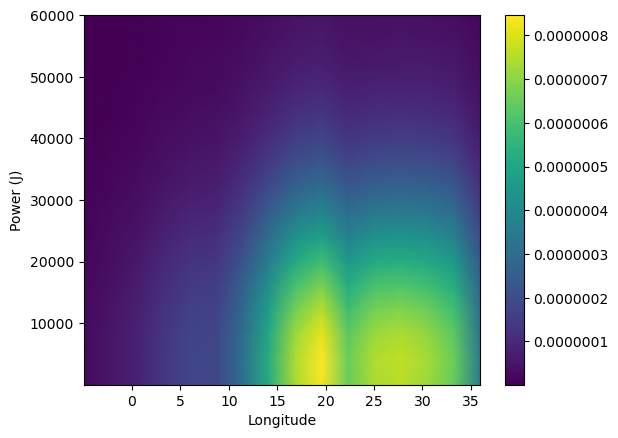

In [4]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Assume that you have a dataframe with columns "Longitude" and "Power (J)"
df =  df2.copy()

# Extract the Longitude and Power (J) values from the dataframe
x = df["Longitude"].values
y = df["Power (J)"].values

# Combine the Longitude and Power (J) values into a single array
data = np.vstack([x, y])

# Create a bivariate KDE estimate using the Gaussian kernel
kde = gaussian_kde(data, bw_method=0.2)

# Evaluate the KDE at a set of points
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), 60000
X, Y = np.mgrid[xmin:xmax:16j, ymin:ymax:16j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kde.evaluate(positions).T, X.shape)

# Create the bivariate KDE plot
fig, ax = plt.subplots()
plt.pcolormesh(X, Y, Z.reshape(X.shape), shading='gouraud')

plt.colorbar(format='%.7f')
ax.set_xlabel("Longitude")
ax.set_ylabel("Power (J)")
plt.show()



In [ ]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Assume that you have a dataframe with columns "Longitude" and "Power (J)"
df =  pd.read_csv('CSVs/2010-2011.csv')

# Extract the Longitude and Power (J) values from the dataframe
x = df["Longitude"].values
y = df["Power (J)"].values

# Combine the Longitude and Power (J) values into a single array
data = np.vstack([x, y])

# Create a bivariate KDE estimate using the Gaussian kernel
kde = gaussian_kde(data, bw_method=0.2)

# Evaluate the KDE at a set of points
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), 60000
X, Y = np.mgrid[xmin:xmax:16j, ymin:ymax:16j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kde.evaluate(positions).T, X.shape)

# Create the bivariate KDE plot
fig, ax = plt.subplots()
plt.pcolormesh(X, Y, Z.reshape(X.shape), shading='gouraud')

plt.colorbar(format='%.7f')
ax.set_xlabel("Longitude")
ax.set_ylabel("Power (J)")
plt.show()

In [7]:
import xarray as xr
import pandas as pd

ds = xr.open_dataset('monthlysalinity.nc')
df = ds.to_dataframe()
df

so
depth    latitude time                longitude            
0.494025 30.0     2020-12-16 12:00:00 -6.000000         NaN
                                      -5.916667         NaN
                                      -5.833333         NaN
                                      -5.750000         NaN
                                      -5.666667         NaN
...                                                     ...
         46.0     2020-12-16 12:00:00  35.666668  10.652486
                                       35.750000  10.625019
                                       35.833332  10.597552
                                       35.916668  10.571611
                                       36.000000  10.536515

[97465 rows x 1 columns]